Food Delivery Time Prediction Using Linear Regression

Yashodhan Agashe

250840325077 



In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

from numpy.linalg import inv
from numpy import random
import os
import scipy
from scipy import stats
from scipy.stats import binom, poisson, expon, norm, t, rv_discrete, f, chisquare, chi2_contingency, chi2
import pylab
from pylab import legend
from pylab import plot, show, title, xlabel, ylabel

import statsmodels
from statsmodels import stats
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson, test_poisson_2indep
from statsmodels.stats import proportion as ssp
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, RidgeCV

SECTION A: LINEAR REGRESSION (20 QUESTIONS) 

Q1. Load the dataset and display the first five rows. Describe the purpose of each column.  Order_ID -> shows the id of the order

Distance_km -> shows the distance travelled by the delivery partner

Weather -> weather during time of delivery

Traffic_Level -> Traffic encountered by the delivery partner

Time_of-day -> Time of order

Vehicle_type -> Vehicle used for delivery

Preparation_Time_min -> time required to prepare the order

Courier_Experience_yrs -> Experience in years of delivery partner

Delivery_Time_min -> Time required for delivery

In [ ]:
df = pd.read_csv(r"")

In [3]:
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


Q2. Find the total number of records and features in the dataset.

In [6]:
df.shape

(1000, 9)

In [7]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


Q3. Identify:

(a) Numerical variables: Order_ID, Distance_km, Preparation_Time_min, Courier_Experience_yrs, Delivery_Time_min

(b) Categorical variables: Weather, Traffic_Level, Time_of_Day, Vehicle_Type

(c) Target variable: Delivery_Time_min

Q4. Check for missing values in all columns. Identify which column contains missing data.

In [8]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

Q5. Handle the missing value in the Time_of_Day column using an appropriate method and
justify your choice.

In [9]:
df["Courier_Experience_yrs"].dtype

dtype('float64')

In [10]:
df["Courier_Experience_yrs"] = df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].median())

In [11]:
cols = ["Weather", "Traffic_Level", "Time_of_Day"]

for col in cols:
    # Step 1: get proportions (excluding NaN)
    proportions = df[col].value_counts(normalize=True)

    # Step 2: number of missing rows
    n_missing = df[col].isna().sum()

    # Step 3: exact counts to assign for each category
    fill_counts = (proportions * n_missing).round().astype(int)

    # Step 4: fix rounding mismatch
    diff = n_missing - fill_counts.sum()
    if diff != 0:
        fill_counts.iloc[0] += diff  # adjust first category

    # Step 5: create ordered list of values to fill
    fill_values = []
    for cat, count in fill_counts.items():
        fill_values.extend([cat] * count)

    # Step 6: fill missing values deterministically
    df.loc[df[col].isna(), col] = fill_values


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


Q6. Remove the Order_ID column and explain why it should not be used in model training.

In [13]:
df.drop(["Order_ID"], axis=1, inplace=True)
df

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13,3.0,54
996,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


Q7. Apply One-Hot Encoding to the following categorical columns:

Weather

Traffic_Level

Time_of_Day

Vehicle_Type

In [14]:
df_enc = pd.get_dummies(df, columns=["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"], drop_first=True).astype(int)
df_enc

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7,12,1,43,0,0,0,1,1,0,0,0,0,0,1
1,16,20,2,84,0,0,0,0,0,1,1,0,0,0,0
2,9,28,1,59,1,0,0,0,1,0,0,0,1,0,1
3,7,5,1,37,0,1,0,0,0,1,0,0,0,0,1
4,19,16,5,68,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,13,3,54,0,0,0,0,0,0,1,0,0,1,0
996,16,8,9,71,0,1,0,0,1,0,0,1,0,0,1
997,15,26,2,81,0,0,1,0,0,0,1,0,0,0,1
998,14,8,0,55,0,0,0,0,1,0,0,0,0,0,0


Q8. Explain why categorical features must be converted into numerical form before applying
Linear Regression.

Linear Regression is built on mathematical operations that require numerical data and not labels. So operations cannot be peformed directly on categorical data. 

Hence we need to convert categories to numerical values.

Q9. After encoding, report the new total number of input features.


In [15]:
df_enc.shape

(1000, 15)

Q10. Define the feature matrix X and target vector y.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


Q11. Train a Linear Regression model using the dataset.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df_enc.drop("Delivery_Time_min", axis=1), df.Delivery_Time_min, test_size=0.1, random_state=20)

In [18]:
x_train = sm.add_constant(x_train, prepend=False)
x_test = sm.add_constant(x_test, prepend=False)

mod1 = sm.OLS(y_train, x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      Delivery_Time_min   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 10 Dec 2025   Prob (F-statistic):          9.30e-274
Time:                        22:57:50   Log-Likelihood:                -3389.9
No. Observations:                 900   AIC:                             6810.
Df Residuals:                     885   BIC:                             6882.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance_km                2

Q12. Write the regression equation using:

Intercept

Coefficients of all features

y​=18.773458+2.952856(Distance_km)+0.987224(Preparation_Time_min)−0.601203(Courier_Experience_yrs)

+7.395302(Weather_Foggy)+5.025539(Weather_Rainy)+9.132361(Weather_Snowy)+2.125360(Weather_Windy)

−11.678138(Traffic_Level_Low)−6.242082(Traffic_Level_Medium)+0.812362(Time_of_Day_Evening)

−0.792399(Time_of_Day_Morning)−1.297171(Time_of_Day_Night)+0.387178(Vehicle_Type_Car)−0.813374(Vehicle_Type_Scooter)

Q13. Predict the delivery time for all input records using the trained model.

In [19]:
y_pred1 = mod1.predict(x_train)
y_pred1

18     35.122218
189    57.233817
444    51.123038
624    30.688588
586    51.524408
         ...    
924    90.236622
223    37.042440
271    76.201607
474    72.852090
355    29.977367
Length: 900, dtype: float64

In [20]:
y_pred2 =  mod1.predict(x_test)
y_pred2

890    94.739253
694    68.779762
798    91.045143
147    37.128488
858    67.466453
         ...    
182    43.806745
440    37.168061
356    34.345044
317    65.758592
561    47.217574
Length: 100, dtype: float64

In [30]:
pred_data = sm.add_constant(df_enc.drop("Delivery_Time_min", axis=1), prepend=False)
pred_data

y_pred = mod1.predict(pred_data)

In [67]:
y_pred

0      40.322783
1      79.131506
2      65.996851
3      41.748449
4      75.196750
         ...    
995    54.626148
996    60.247742
997    96.663065
998    56.333094
999    51.986980
Length: 1000, dtype: float64

Q14. Add a new column called Predicted_Delivery_Time to the dataset.

In [37]:
df["Predicted_Delivery_Time"] = y_pred

In [39]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Predicted_Delivery_Time
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,40.322783
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84,79.131506
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59,65.996851
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,41.748449
4,19.03,Clear,Low,Morning,Bike,16,5.0,68,75.196750


Q15. Compute the residuals (Actual − Predicted Delivery Time) for all observations.

In [40]:
df["Residuals"] = df["Delivery_Time_min"] - df["Predicted_Delivery_Time"]

In [41]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Predicted_Delivery_Time,Residuals
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,40.322783,2.677217
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84,79.131506,4.868494
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59,65.996851,-6.996851
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,41.748449,-4.748449
4,19.03,Clear,Low,Morning,Bike,16,5.0,68,75.196750,-7.196750


Q16. Calculate the Mean Absolute Error (MAE) of the model.

In [44]:
mae = mean_absolute_error(df["Delivery_Time_min"], df["Predicted_Delivery_Time"])
mae

6.53481625560832

Q17. Calculate the Mean Squared Error (MSE) of the model.

In [47]:
mse = mean_squared_error(df["Delivery_Time_min"], df["Predicted_Delivery_Time"])
mse

110.48547059837993

Q18. Calculate the R² Score and explain its meaning in the context of this dataset.

R² tells you how much of the variation in the target variable (Sales) is explained by the independent variables in your model.

In [50]:
r2 = r2_score(df["Delivery_Time_min"], df["Predicted_Delivery_Time"])
r2

0.7729617690364269

Q19. Identify the top three features that have the strongest impact on Delivery Time based
on model coefficients.

Weather_Foggy              

Preparation_Time_min       

Distance_km                

Q20. Based on your results, provide three practical business recommendations to reduce
food delivery time.

Reduce Preparation Time.

Choose routes with less traffic and less Distances.



Q21. Plot a histogram of Distance_km. Describe the distribution.

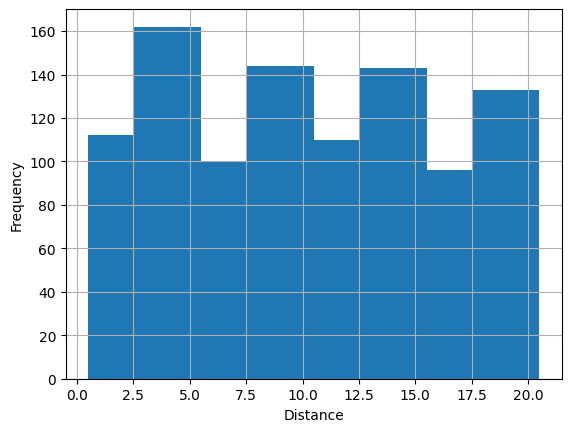

In [66]:
bins = [0.5,2.5,5.5,7.5,10.5,12.5,15.5,17.5,20.5]
plt.hist(df.Distance_km, bins=bins)
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Q22. Plot a histogram of Preparation_Time_min. State whether the data is uniformly
distributed.

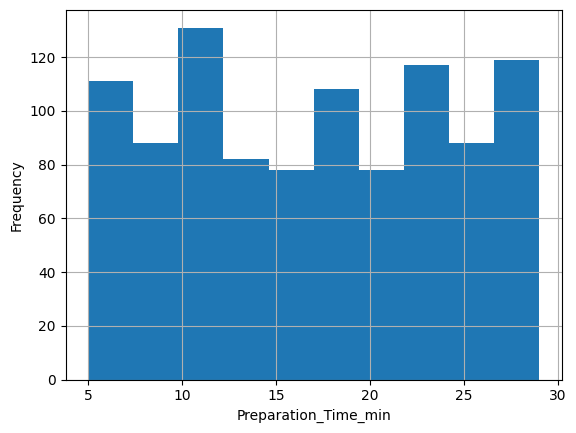

In [65]:
plt.hist(df.Preparation_Time_min)
plt.xlabel("Preparation_Time_min")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Q23. Create a bar chart showing average Delivery_Time_min for each Traffic_Level.

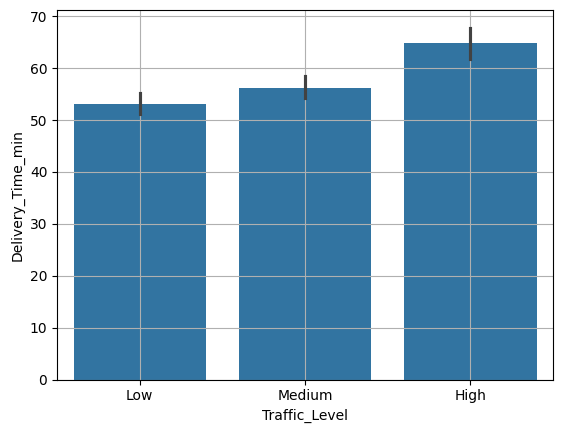

In [24]:
sns.barplot(data = df, x = "Traffic_Level", y = "Delivery_Time_min", estimator="mean")
plt.grid()
plt.show()

Q24. Create a bar chart showing average Delivery_Time_min for each Weather condition.

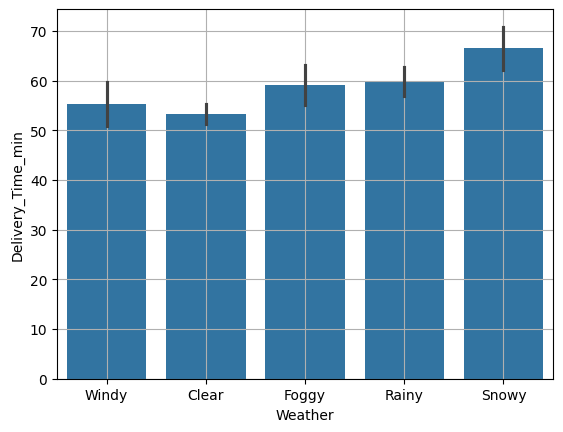

In [25]:
sns.barplot(data = df, x = "Weather", y = "Delivery_Time_min", estimator="mean")
plt.grid()
plt.show()

Q25. Create a bar chart showing average Delivery_Time_min for each Vehicle_Type.

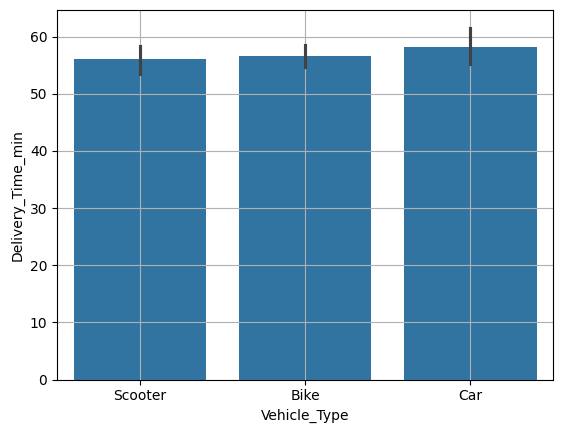

In [26]:
sns.barplot(data = df, x = "Vehicle_Type", y = "Delivery_Time_min", estimator="mean")
plt.grid()
plt.show()

Q26. Draw a scatter plot of Distance_km versus Delivery_Time_min. Comment on the trend.

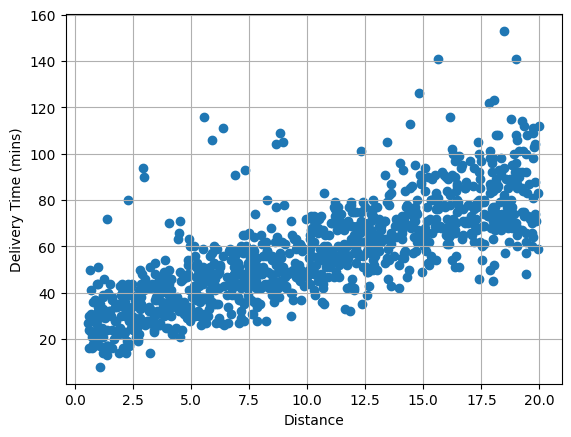

In [27]:
plt.scatter(x=df.Distance_km, y=df.Delivery_Time_min)
plt.grid()
plt.xlabel("Distance")
plt.ylabel("Delivery Time (mins)")
plt.show()

Q27. Draw a scatter plot of Courier_Experience_yrs versus Delivery_Time_min. Explain the
relationship.

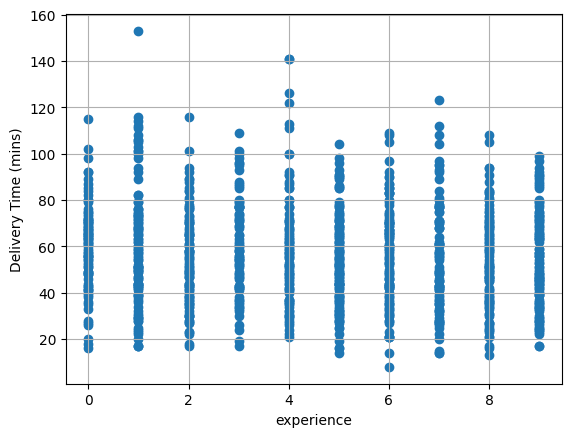

In [28]:
plt.scatter(x=df.Courier_Experience_yrs, y=df.Delivery_Time_min)
plt.grid()
plt.xlabel("experience")
plt.ylabel("Delivery Time (mins)")
plt.show()

Q28. Create a boxplot of Delivery_Time_min grouped by Time_of_Day.

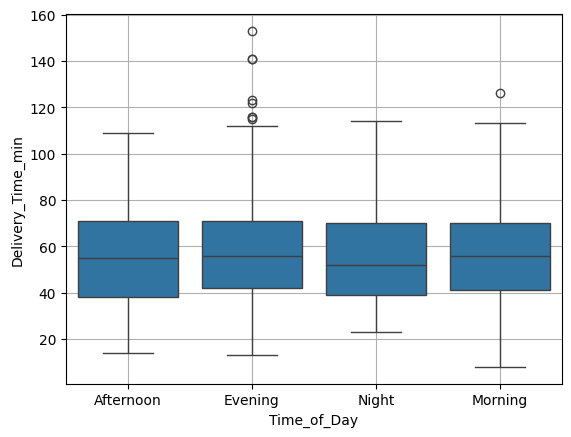

In [54]:
sns.boxplot(data=df, x="Time_of_Day", y="Delivery_Time_min")
plt.grid()
plt.show()

Q29. Plot a scatter plot of Actual vs Predicted Delivery Time.

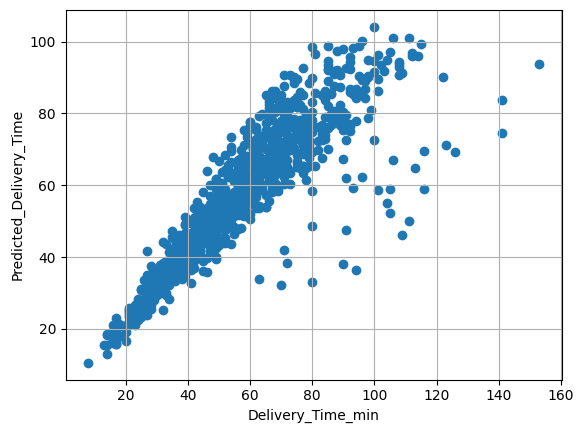

In [64]:
plt.scatter(x=df["Delivery_Time_min"], y=df["Predicted_Delivery_Time"])
plt.xlabel("Delivery_Time_min")
plt.ylabel("Predicted_Delivery_Time")
plt.grid()
plt.show()

Q30. Plot the residuals against the predicted values and comment on model behavior.

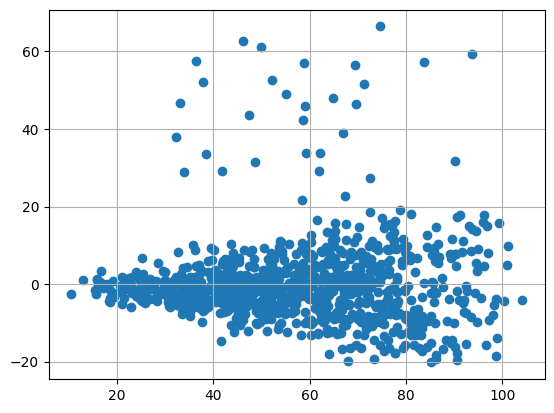

In [63]:
plt.scatter(x=df["Predicted_Delivery_Time"], y=df["Residuals"])
plt.grid()
plt.show()